# 18BCE101

## DM prac 3

__AIM:__

Implement suitable method (using concept of Quartile) in C/C++/Java/Python for detection of  outliers present in the following data set  : also take steps of remove these identified outliers from the given data set. 
Name    Value

A    45

B    37

C    59

D    150

E    47

F    39

G    5

H    43

I    52

J    100

Numeric Outlier

This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).
The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point xi that lies outside the interquartile range. That is:

Using the interquartile multiplier value k=1.5, the range limits are the typical upper and lower whiskers of a box plot.


xi > Q3 + k x IQR

xi<Q1-k x IQR

In [1]:
#importing required libraries

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\labdh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Working on sample data

In [2]:
data = [45, 37, 59, 150, 47, 39, 5, 43, 52, 100]
data.sort()
print(data)

q1, q3= np.percentile(data,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print()
print("Lower bound",lower_bound)
print("First Quartile",q1)
print("Third Quartile",q3)
print("Upper bound",upper_bound)
print("Inter quartile range",iqr)

[5, 37, 39, 43, 45, 47, 52, 59, 100, 150]

Lower bound 14.125
First Quartile 40.0
Third Quartile 57.25
Upper bound 83.125
Inter quartile range 17.25


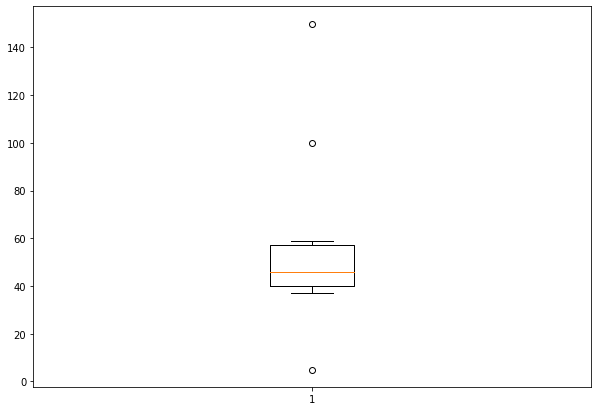

In [3]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(data) 
plt.show() 

Thus we observe that points - (5, 100, 150) are the outliers

[37, 39, 43, 45, 47, 52, 59]


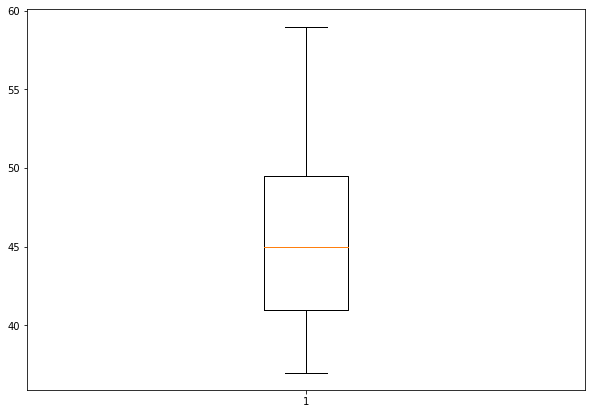

In [4]:
#removing outliers

data_clean = []

for i in data:
    if i >= lower_bound and i <= upper_bound:
        data_clean.append(i)
print(data_clean)

fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(data_clean) 
plt.show() 

### Real world example

mtcars data produced by analysis performed for the Motor Trend, a magazine about the automobile industry. By looking at a data set of a collection of cars, we are interested in exploring the relationship between a set of variables and miles per gallon (MPG) as outcome.

In [5]:
#defining the function for outlier removal

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [6]:
#loading the dataset

df = pd.read_csv('mtcars.csv')
print(df.shape)
df.head()

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


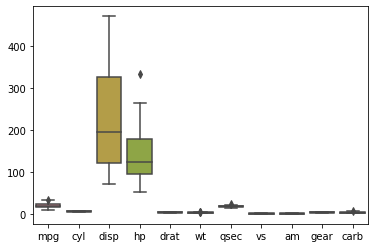

In [7]:
#plotting the boxplot of the columns

sns.boxplot(data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b03b173348>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03b173c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03b170988>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03b177bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03b17ba08>],
 'means': []}

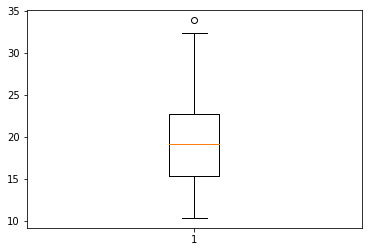

In [8]:
plt.boxplot(df.mpg)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b03aeaca48>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03aea9908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03ae9f208>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03ae58508>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03aedb2c8>],
 'means': []}

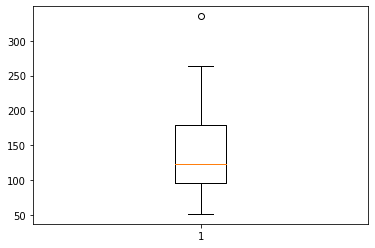

In [9]:
plt.boxplot(df.hp)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b03b1d3f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03b1d7ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03b1d3848>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03b1dcf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03b1dcfc8>],
 'means': []}

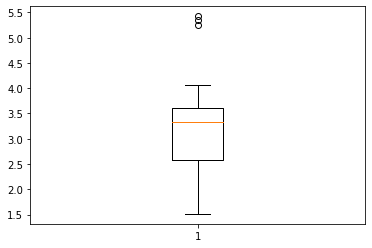

In [10]:
plt.boxplot(df.wt)

In [12]:
# select columns
df = df[['mpg','cyl','disp','hp','wt']]

# create a predictors and predictant variables
X = df.drop('mpg',axis=1)
y = df.mpg

# 80% train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# using linear regression object call fit
reg = LinearRegression().fit(X_train, y_train)

# adjusted-rsquared value
reg.score(X_test, y_test)

0.5831506764829771

Lowerbound =  -28.75

Upperbound 305.25


{'whiskers': [<matplotlib.lines.Line2D at 0x2b03b24cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03b255ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03b24cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03b259ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03b25da88>],
 'means': []}

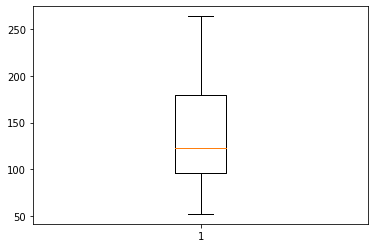

In [13]:
#outlier treatment of hp

lowerbound, upperbound = outlier_treatment(df.hp)

print("Lowerbound = ",lowerbound)
print("\nUpperbound",upperbound)

df = df[df['hp']< upperbound]

plt.boxplot(df.hp)

Lowerbound =  0.8812500000000001

Upperbound 5.311249999999999


{'whiskers': [<matplotlib.lines.Line2D at 0x2b03b2b7e08>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03b2badc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03b2b7388>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03b2bed48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03b2bee88>],
 'means': []}

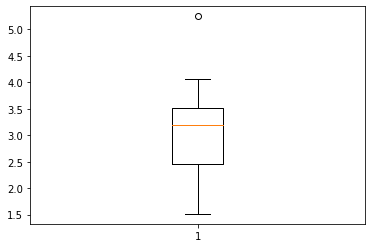

In [14]:
#outlier treatment of wt

lowerbound, upperbound = outlier_treatment(df.wt)

print("Lowerbound = ",lowerbound)
print("\nUpperbound",upperbound)

df = df[df['wt']< upperbound]

plt.boxplot(df.wt)

Lowerbound =  6.799999999999995

Upperbound 32.400000000000006


{'whiskers': [<matplotlib.lines.Line2D at 0x2b03b325608>,
 'caps': [<matplotlib.lines.Line2D at 0x2b03b325f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b03b321b48>],
 'medians': [<matplotlib.lines.Line2D at 0x2b03b329e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b03b32ecc8>],
 'means': []}

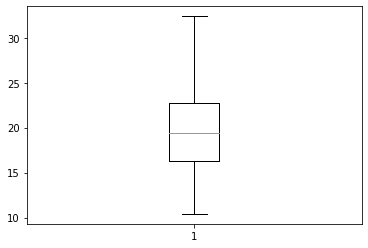

In [15]:
#outlier treatment of mpg

lowerbound, upperbound = outlier_treatment(df.mpg)

print("Lowerbound = ",lowerbound)
print("\nUpperbound",upperbound)

df = df[df['mpg']< upperbound]

plt.boxplot(df.mpg)

In [21]:
#post outlier treatment

reg = LinearRegression().fit(X_train, y_train)

# adjusted-rsquared value
reg.score(X_test, y_test)

0.7424468023730224

### Conclusion

Thus we conclude that after performing outlier detection and removing using IQR, we are improving the performance. The higher the adjusted R^2 better the regression equation as it implies that the independent variable is chosen to determine the dependent variable can explain the variation in the dependent variable.